<a href="https://colab.research.google.com/github/Moutaz-Code/CancerModelColab/blob/main/Data_Mining_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [145]:
!pip install scipy
!pip install scikit-learn

from google.colab import drive

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from typing import final
import seaborn as sns
import pandas as pd
import numpy as np
import kagglehub
import os


# Read the Dataset and store it in DATA

In [93]:
path_to_directory = kagglehub.dataset_download("zahidmughal2343/global-cancer-patients-2015-2024")
file_path = os.path.join(path_to_directory, 'global_cancer_patients_2015_2024.csv')
originalDATA = pd.read_csv(file_path) # FINAL do NOT change


100%|██████████| 1.20M/1.20M [00:00<00:00, 67.3MB/s]

Extracting files...


In [117]:
#Putting assignments alone so that we don't have to import the dataset every time we wanna assign stuff
testData_1 = testData_2 = testData_3 = originalDATA

# ***DATA Splitting***
---

In [118]:
testData_1 = testData_1.sample(n=10000, random_state=42).reset_index(drop=True)


# The .sample(n=5000, random_state=42) line randomly selects 5000 rows from the testData_1 DataFrame.
# Using a fixed random_state ensures reproducibility of the sampling.
# .reset_index(drop=True) resets the DataFrame index after sampling to have a clean 0-based index.

# Explore the Dataset

In [119]:
# No null values
testData_1.info()
print("\n==========================\t")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             10000 non-null  object 
 1   Age                    10000 non-null  int64  
 2   Gender                 10000 non-null  object 
 3   Country_Region         10000 non-null  object 
 4   Year                   10000 non-null  int64  
 5   Genetic_Risk           10000 non-null  float64
 6   Air_Pollution          10000 non-null  float64
 7   Alcohol_Use            10000 non-null  float64
 8   Smoking                10000 non-null  float64
 9   Obesity_Level          10000 non-null  float64
 10  Cancer_Type            10000 non-null  object 
 11  Cancer_Stage           10000 non-null  object 
 12  Treatment_Cost_USD     10000 non-null  float64
 13  Survival_Years         10000 non-null  float64
 14  Target_Severity_Score  10000 non-null  float64
dtypes: 

In [120]:
# mean vary significanlty between each attribute ==> Normalization is NEEDED!!!
# std not very high. Suggesting the distribution is good in each attribute
testData_1.describe()


,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,54.500600,2019.454700,4.983190,5.037670,4.991180,4.972860,4.978390,52613.848443,5.053290,4.941061
std,20.178149,2.857125,2.891457,2.909286,2.862019,2.879288,2.896823,27608.242504,2.884821,1.192061
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5006.490000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.600000,2.500000,2.500000,28306.930000,2.600000,4.120000
50%,55.000000,2019.000000,5.000000,5.100000,5.000000,5.000000,5.000000,53055.080000,5.100000,4.940000
75%,72.000000,2022.000000,7.500000,7.600000,7.500000,7.400000,7.500000,76767.602500,7.500000,5.770000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99978.250000,10.000000,8.810000


In [121]:
# DATA DataFrame does not contain any duplicate rows
print(testData_1.duplicated().sum())


0


# ***ENCODING***


---

*   **Gender** ==> label encoding (0, 1)
*   **Years** ==> Ordinal Encoding (not necessary as it is integer)
*   **Country_Region** ==> label encoding (0, 1, 2, .....)
*   **Cancer_type** ==> one-hot encoding
*   **Cancer_stage** ==> ordinal encoding



In [122]:
# Gender ==> label encoding (0, 1) (Female, Male)

le = LabelEncoder()
testData_1['Gender'] = le.fit_transform(testData_1['Gender'])


In [123]:
# Cancer_Type ==> one-hot encoding

ohe = OneHotEncoder(handle_unknown='ignore')
cancer_type_encoded = ohe.fit_transform(testData_1[['Cancer_Type']]).toarray()
cancer_type_df = pd.DataFrame(cancer_type_encoded, columns=ohe.get_feature_names_out(['Cancer_Type']))
testData_1 = pd.concat([testData_1.drop('Cancer_Type', axis=1), cancer_type_df], axis=1)



In [124]:
#Country_Region ==> label encoding (0, 1, 2, .....)

le = LabelEncoder()
testData_1['Country_Region'] = le.fit_transform(testData_1['Country_Region'])

In [125]:
# Cancer_Stage ==> ordinal encoding

ord = OrdinalEncoder()
testData_1['Cancer_Stage'] = ord.fit_transform(testData_1[['Cancer_Stage']])

In [126]:
testData_1

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,...,Survival_Years,Target_Severity_Score,Cancer_Type_Breast,Cancer_Type_Cervical,Cancer_Type_Colon,Cancer_Type_Leukemia,Cancer_Type_Liver,Cancer_Type_Lung,Cancer_Type_Prostate,Cancer_Type_Skin
0,PT0033553,63,1,0,2023,8.5,0.8,7.6,8.4,6.9,...,2.7,7.22,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,PT0009427,64,2,5,2021,6.8,1.9,3.1,2.4,6.4,...,0.9,4.01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PT0000199,79,0,4,2019,9.4,5.0,4.9,8.4,2.7,...,2.6,6.06,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,PT0012447,56,2,4,2019,5.9,7.5,6.5,0.5,7.5,...,3.3,4.90,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,PT0039489,41,1,4,2023,4.0,4.4,3.4,7.9,7.6,...,9.3,5.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PT0028567,36,2,6,2018,4.2,5.0,3.0,2.7,0.0,...,6.2,3.56,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9996,PT0025079,73,1,4,2019,6.6,2.3,7.8,2.7,2.3,...,4.0,4.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9997,PT0018707,23,2,2,2021,1.5,5.5,0.1,3.4,5.7,...,5.1,3.26,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9998,PT0015200,77,2,8,2016,5.7,4.6,2.0,1.7,4.5,...,0.9,3.30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# ***FEATURE SELECTION***
---


*   Drop Patient ID
*   Investigate what other attributes to be dropped using some techniques, e.g, information gain



##1) Pearson's Heatmaps

In [127]:
testData_1 = testData_1.drop('Patient_ID', axis=1)

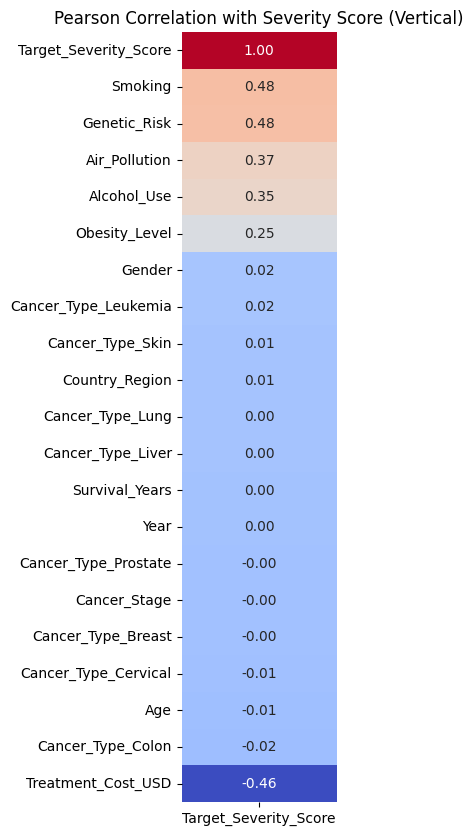

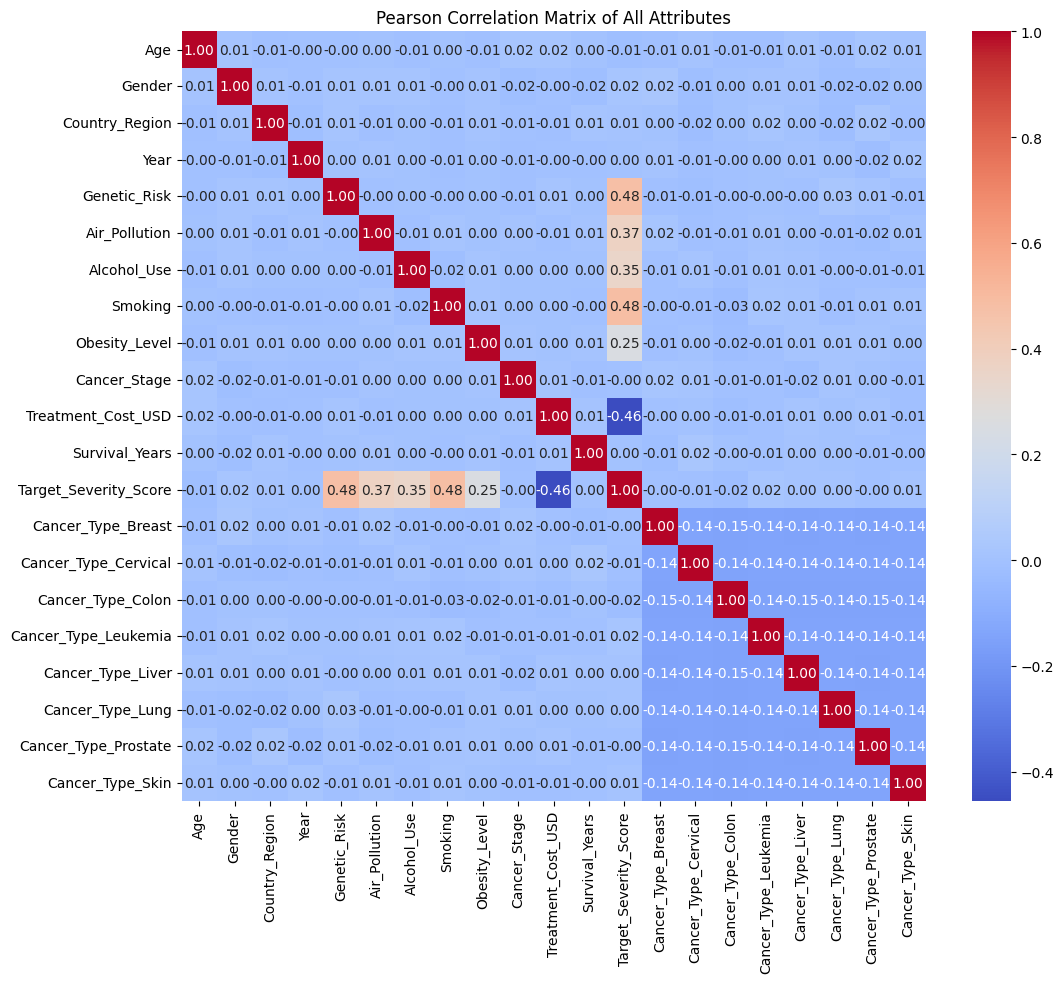

In [143]:
correlation_with_target = testData_1.corr()['Target_Severity_Score'].sort_values(ascending=False)
correlation_matrix = testData_1.corr()

# 1D Heatmap for correlation with target_severity_score, using pearson's
plt.figure(figsize=(2, 10))
sns.heatmap(correlation_with_target.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Pearson Correlation with Severity Score (Vertical)')
plt.yticks(rotation=0)
plt.show()

print("\n")

# 2D Heatmap, using pearson's
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix of All Attributes')
plt.show()


##2) Anova

In [144]:
X = testData_1.drop('Target_Severity_Score', axis=1)
y = testData_1['Target_Severity_Score']


k_best_anova = SelectKBest(score_func=f_regression, k='all')
k_best_anova.fit(X, y)

# Get scores and p-values
anova_scores = pd.DataFrame({'Feature': X.columns, 'ANOVA_Score': k_best_anova.scores_})

# Sort by score
anova_scores = anova_scores.sort_values(by='ANOVA_Score', ascending=False)

print("\nFeatures ranked by ANOVA F-value:")
print(anova_scores)



Features ranked by ANOVA F-value:
                 Feature  ANOVA_Score
7                Smoking  3050.485265
4           Genetic_Risk  2940.821877
10    Treatment_Cost_USD  2629.893852
5          Air_Pollution  1589.046323
6            Alcohol_Use  1407.357409
8          Obesity_Level   688.261572
14     Cancer_Type_Colon     3.435450
1                 Gender     3.004039
15  Cancer_Type_Leukemia     2.623136
0                    Age     1.814047
13  Cancer_Type_Cervical     0.846102
19      Cancer_Type_Skin     0.660038
2         Country_Region     0.369074
17      Cancer_Type_Lung     0.249448
16     Cancer_Type_Liver     0.231417
12    Cancer_Type_Breast     0.159681
11        Survival_Years     0.065981
9           Cancer_Stage     0.042358
18  Cancer_Type_Prostate     0.042354
3                   Year     0.040517

Features ranked by Mutual Information:
                 Feature  Mutual_Information_Score
7                Smoking                  0.134213
4           Genetic_Risk 

##3) Mutual Information

In [146]:

# --- Using Mutual Information ---
# Select features based on mutual information between each feature and the target
# Suitable for both numerical and categorical features, and can capture non-linear relationships.
# Note: mutual_info_classif is for discrete targets, mutual_info_regression is for continuous targets.
# Again, checking the target type to choose the appropriate function.

selector_mi = SelectKBest(score_func=mutual_info_regression, k='all')
selector_mi.fit(X, y)

# Get scores
mi_scores = pd.DataFrame({'Feature': X.columns, 'Mutual_Information_Score': selector_mi.scores_})

# Sort by score
mi_scores = mi_scores.sort_values(by='Mutual_Information_Score', ascending=False)

print("\nFeatures ranked by Mutual Information:")
print(mi_scores)

# You can use these rankings to select the top K features based on ANOVA or Mutual Information scores.
# For example, to get the top 5 features based on Mutual Information:
top_5_mi_features = mi_scores['Feature'].head(5).tolist()
print(f"\nTop 5 features based on Mutual Information: {top_5_mi_features}")


Features ranked by Mutual Information:
                 Feature  Mutual_Information_Score
4           Genetic_Risk                  0.135525
7                Smoking                  0.128245
10    Treatment_Cost_USD                  0.104554
5          Air_Pollution                  0.083635
6            Alcohol_Use                  0.070803
8          Obesity_Level                  0.037565
1                 Gender                  0.010496
3                   Year                  0.007288
11        Survival_Years                  0.005969
15  Cancer_Type_Leukemia                  0.002538
13  Cancer_Type_Cervical                  0.001608
17      Cancer_Type_Lung                  0.000646
2         Country_Region                  0.000000
0                    Age                  0.000000
9           Cancer_Stage                  0.000000
12    Cancer_Type_Breast                  0.000000
14     Cancer_Type_Colon                  0.000000
16     Cancer_Type_Liver                  

# ***DROP IRRELEVANT***
---

In [153]:
# Prepare X and y
X = testData_1.drop('Target_Severity_Score', axis=1)
y = testData_1['Target_Severity_Score']

# Perform Mutual Information feature selection
selector = SelectKBest(score_func=mutual_info_regression, k='all')
selector.fit(X, y)

# Get scores
mi_scores = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': selector.scores_
})

# Filter features with Mutual Information score >= 0.01
selected_features_mi = mi_scores[mi_scores['MI_Score'] > 0.01]['Feature'].tolist()

# Create new DataFrame with selected features + target
mi_filtered_data = testData_1[selected_features_mi + ['Target_Severity_Score']]

# Display the selected features
print("Selected features with Mutual Information score >= 0.01:")
print(selected_features_mi)

# Identify and print dropped features
dropped_features_mi = set(X.columns) - set(selected_features_mi)
print("Dropped features:")
print(dropped_features_mi)

Selected features with Mutual Information score >= 0.01:
['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level', 'Treatment_Cost_USD']
Dropped features:
{'Cancer_Type_Liver', 'Year', 'Gender', 'Cancer_Stage', 'Survival_Years', 'Cancer_Type_Breast', 'Cancer_Type_Prostate', 'Cancer_Type_Leukemia', 'Cancer_Type_Colon', 'Cancer_Type_Lung', 'Cancer_Type_Skin', 'Age', 'Country_Region', 'Cancer_Type_Cervical'}


In [149]:
#mi_filtered_data

In [154]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),

}

In [155]:
# evaluation function
def evaluate_models(X, y, models):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results.append({
            "Model": name,
            "MAE": mean_absolute_error(y_test, y_pred),
            "MSE": mean_squared_error(y_test, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
            "R2": r2_score(y_test, y_pred)
        })
    return pd.DataFrame(results)


In [156]:
# Evaluate on testData_1
print("Evaluating models on testData_1:")
X_modified = testData_1.drop('Target_Severity_Score', axis=1)
y_modified = testData_1['Target_Severity_Score']
modified_results = evaluate_models(X_modified, y_modified, models)
print(modified_results)

print("\n" + "="*50 + "\n")

# Evaluate on feature_selected_data
print("Evaluating models on feature_selected_data:")
X_selected = mi_filtered_data.drop('Target_Severity_Score', axis=1)
y_selected = mi_filtered_data['Target_Severity_Score']
selected_results = evaluate_models(X_selected, y_selected, models)
print(selected_results)

Evaluating models on testData_1:
               Model       MAE       MSE      RMSE        R2
0  Linear Regression  0.002492  0.000008  0.002886  0.999994
1      Decision Tree  0.393630  0.245412  0.495391  0.821157
2      Random Forest  0.198109  0.061322  0.247632  0.955312
3  Gradient Boosting  0.112321  0.019834  0.140832  0.985546


Evaluating models on feature_selected_data:
               Model       MAE       MSE      RMSE        R2
0  Linear Regression  0.002488  0.000008  0.002883  0.999994
1      Decision Tree  0.359340  0.204298  0.451993  0.851119
2      Random Forest  0.175455  0.048367  0.219925  0.964753
3  Gradient Boosting  0.112321  0.019834  0.140832  0.985546


In [157]:
#filtering outliers
Q1 = mi_filtered_data['Target_Severity_Score'].quantile(0.25)
Q3 = mi_filtered_data['Target_Severity_Score'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out the outliers in the target column
no_outliers = mi_filtered_data[
    (mi_filtered_data['Target_Severity_Score'] >= lower_bound) &
    (mi_filtered_data['Target_Severity_Score'] <= upper_bound)
]

# Step 4: Optionally, check how many rows were removed
print(f"Original rows: {len(mi_filtered_data)}")
print(f"Rows after outlier removal: {len(no_outliers)}")



Original rows: 10000
Rows after outlier removal: 9970


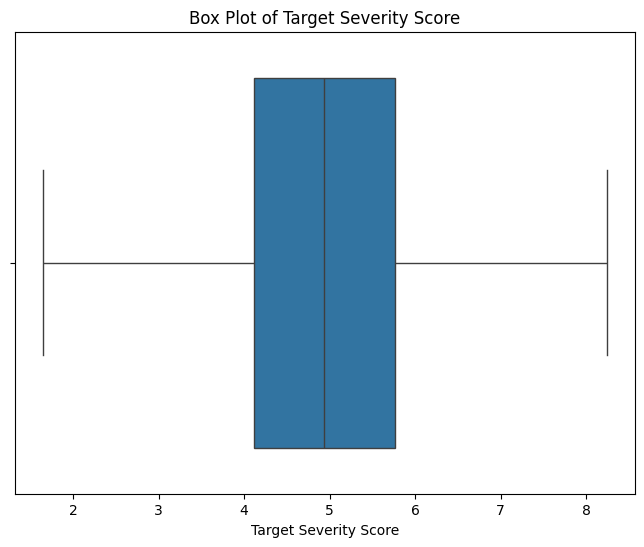

In [158]:
# Do the box plot for the target attribute
plt.figure(figsize=(8, 6))
sns.boxplot(x=no_outliers['Target_Severity_Score'])
plt.title('Box Plot of Target Severity Score')
plt.xlabel('Target Severity Score')
plt.show()

In [171]:
# Evaluate on no_outliers
print("Evaluating models on no_outliers:")
X_no_outliers = mi_filtered_data.drop('Target_Severity_Score', axis=1)
y_no_outliers = mi_filtered_data['Target_Severity_Score']
selected_results = evaluate_models(X_selected, y_selected, models)
print(selected_results)

Evaluating models on no_outliers:
               Model       MAE       MSE      RMSE        R2
0  Linear Regression  0.002488  0.000008  0.002883  0.999994
1      Decision Tree  0.359340  0.204298  0.451993  0.851119
2      Random Forest  0.175455  0.048367  0.219925  0.964753
3  Gradient Boosting  0.112321  0.019834  0.140832  0.985546


In [160]:
scaler = StandardScaler()
standard_scaled_data = pd.DataFrame(scaler.fit_transform(no_outliers), columns=no_outliers.columns)

# Display the scaled data
#standard_scaled_data.head()

In [161]:
# Evaluate on scaledDATA
print("Evaluating models on scaled data:")
X_scaledDATA = standard_scaled_data.drop('Target_Severity_Score', axis=1)
y_scaledDATA = standard_scaled_data['Target_Severity_Score']
selected_results = evaluate_models(X_selected, y_selected, models)
print(selected_results)

Evaluating models on scaled data:
               Model       MAE       MSE      RMSE        R2
0  Linear Regression  0.002488  0.000008  0.002883  0.999994
1      Decision Tree  0.359340  0.204298  0.451993  0.851119
2      Random Forest  0.175455  0.048367  0.219925  0.964753
3  Gradient Boosting  0.112321  0.019834  0.140832  0.985546


In [172]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer

# Create a scorer for the evaluation metrics
def mean_absolute_error_scorer(y_true, y_pred):
    return -mean_absolute_error(y_true, y_pred) # Return negative for cross_val_score which maximizes
def mean_squared_error_scorer(y_true, y_pred):
    return -mean_squared_error(y_true, y_pred)
def r2_score_scorer(y_true, y_pred):
    return r2_score(y_true, y_pred)

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False) # MAE is lower the better
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False) # MSE is lower the better
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False) # RMSE is lower the better
r2_scorer = make_scorer(r2_score) # R2 is higher the better

scoring = {
    'MAE': mae_scorer,
    'MSE': mse_scorer,
    'RMSE': rmse_scorer,
    'R2': r2_scorer
}

# Add cross-validation
def evaluate_models_cv(X, y, models, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    cv_results = {}
    for name, model in models.items():
        print(f"Performing {n_splits}-fold cross-validation for {name}...")
        scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
        cv_results[name] = {
            "Mean MAE": -scores.mean(), # Convert back to positive MAE
            "Std MAE": scores.std(),
            "Individual MAE Scores": -scores # Store individual scores if needed
        }

        scores_mse = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
        cv_results[name]["Mean MSE"] = -scores_mse.mean()
        cv_results[name]["Std MSE"] = scores_mse.std()

        scores_rmse = cross_val_score(model, X, y, cv=kf, scoring='neg_root_mean_squared_error')
        cv_results[name]["Mean RMSE"] = -scores_rmse.mean()
        cv_results[name]["Std RMSE"] = scores_rmse.std()

        scores_r2 = cross_val_score(model, X, y, cv=kf, scoring='r2')
        cv_results[name]["Mean R2"] = scores_r2.mean()
        cv_results[name]["Std R2"] = scores_r2.std()

    # Convert results to a DataFrame for better visualization
    results_df = pd.DataFrame.from_dict(cv_results, orient='index')
    return results_df

# --- Now evaluate using cross-validation ---

# Evaluate on testData_1 (after encoding and before feature selection/outlier handling)
print("Evaluating models on testData_1 using cross-validation:")
X_modified_cv = testData_1.drop('Target_Severity_Score', axis=1)
y_modified_cv = testData_1['Target_Severity_Score']
modified_cv_results = evaluate_models_cv(X_modified_cv, y_modified_cv, models)
print(modified_cv_results)

print("\n" + "="*50 + "\n")

# Evaluate on feature_selected_data (after feature selection, before outlier handling)
print("Evaluating models on feature_selected_data using cross-validation:")
X_selected_cv = mi_filtered_data.drop('Target_Severity_Score', axis=1)
y_selected_cv = mi_filtered_data['Target_Severity_Score']
selected_cv_results = evaluate_models_cv(X_selected_cv, y_selected_cv, models)
print(selected_cv_results)

print("\n" + "="*50 + "\n")

# Evaluate on no_outliers (after outlier removal, before scaling)
print("Evaluating models on no_outliers data using cross-validation:")
X_no_outliers_cv = no_outliers.drop('Target_Severity_Score', axis=1)
y_no_outliers_cv = no_outliers['Target_Severity_Score']
no_outliers_cv_results = evaluate_models_cv(X_no_outliers_cv, y_no_outliers_cv, models)
print(no_outliers_cv_results)

print("\n" + "="*50 + "\n")

# Evaluate on scaledDATA (after scaling)
print("Evaluating models on scaled data using cross-validation:")
X_scaledDATA_cv = standard_scaled_data.drop('Target_Severity_Score', axis=1)
y_scaledDATA_cv = standard_scaled_data['Target_Severity_Score']
scaledDATA_cv_results = evaluate_models_cv(X_scaledDATA_cv, y_scaledDATA_cv, models)
scaledDATA_cv_results



Evaluating models on testData_1 using cross-validation:
Performing 5-fold cross-validation for Linear Regression...
Performing 5-fold cross-validation for Decision Tree...
Performing 5-fold cross-validation for Random Forest...
Performing 5-fold cross-validation for Gradient Boosting...
                   Mean MAE   Std MAE  \
Linear Regression  0.002501  0.000046   
Decision Tree      0.384703  0.006072   
Random Forest      0.194363  0.004003   
Gradient Boosting  0.108021  0.000978   

                                               Individual MAE Scores  \
Linear Regression  [0.002456952594392226, 0.0025409273396707183, ...   
Decision Tree      [0.377435, 0.38017499999999993, 0.394084999999...   
Random Forest      [0.18743025000000002, 0.19534030000000002, 0.1...   
Gradient Boosting  [0.10770463047055122, 0.1081675582855902, 0.10...   

                   Mean MSE       Std MSE  Mean RMSE  Std RMSE   Mean R2  \
Linear Regression  0.000008  2.788463e-07   0.002891  0.000048  0.999

,Mean MAE,Std MAE,Individual MAE Scores,Mean MSE,Std MSE,Mean RMSE,Std RMSE,Mean R2,Std R2
Linear Regression,0.002121,0.000014,"[0.0021027574158435356, 0.002129557603773357, ...",0.000006,7.890451e-08,0.002452,0.000016,0.999994,5.794469e-08
Decision Tree,0.297083,0.002316,"[0.29555078720811434, 0.30154455785380524, 0.2...",0.139311,2.535288e-03,0.373228,0.003390,0.860631,3.676716e-03
Random Forest,0.146638,0.002684,"[0.14759511222135477, 0.1479922420960256, 0.14...",0.034240,1.194640e-03,0.185011,0.003244,0.965752,1.214208e-03
Gradient Boosting,0.095402,0.003174,"[0.09646843902137273, 0.09265757090271237, 0.0...",0.014311,7.930443e-04,0.119583,0.003360,0.985693,6.522239e-04


In [162]:
# DATA = DATA.drop('Country_Region', axis=1)

#### Convert the Year into Numerical and Drop it

In [163]:
# # Correlation is too low, so drop it
# DATA[['Year', 'Target_Severity_Score']].corr()


In [164]:
# # Correlation is too low, so drop it
# DATA = DATA.drop('Year', axis=1)

## Check Outliers of each Attribute

In [165]:
# # prompt: # prompt: identify if the data has outliers each one in separate graph?

# def detect_outliers_iqr(df, col):
#   """
#   Detects outliers in a DataFrame column using the IQR method and plots a boxplot.

#   Args:
#     df: pandas DataFrame.
#     col: Column name (string).
#   """
#   Q1 = df[col].quantile(0.25)
#   Q3 = df[col].quantile(0.75)
#   IQR = Q3 - Q1

#   lower_bound = Q1 - 1.5 * IQR
#   upper_bound = Q3 + 1.5 * IQR

#   outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

#   plt.figure(figsize=(8, 6))
#   sns.boxplot(x=df[col])
#   plt.title(f'Boxplot of {col} with Outliers')
#   plt.xlabel(col)
#   plt.show()

# # Iterate through numeric columns and identify outliers
# numeric_cols = testData_1.select_dtypes(include=np.number).columns
# for col in numeric_cols:
#   detect_outliers_iqr(testData_1.copy(), col)




In [166]:
# #The values are symmetrically distributed.
# #There’s no heavy skew, and
# #There are no dominant peaks that would drown out other value ranges.

# plt.figure(figsize=(10, 6))
# sns.histplot(DATA['Target_Severity_Score'], kde=True)
# plt.title('Distribution of Target Severity Score')
# plt.xlabel('Target Severity Score')
# plt.ylabel('Frequency')
# plt.show()

DATA['Target_Severity_Score'].describe()


In [167]:
# ## values are close to zeor means it is symmetric (well distributed)
# from scipy.stats import skew, kurtosis
# print("Skewness:", skew(DATA['Target_Severity_Score']))
# print("Kurtosis:", kurtosis(DATA['Target_Severity_Score']))


In [168]:
# ## not that much outliers
# sns.boxplot(x=DATA['Target_Severity_Score'])


In [169]:
# Q1 = DATA['Target_Severity_Score'].quantile(0.25)
# Q3 = DATA['Target_Severity_Score'].quantile(0.75)
# IQR = Q3 - Q1
# filtered = DATA[(DATA['Target_Severity_Score'] >= Q1 - 1.5 * IQR) &
#                 (DATA['Target_Severity_Score'] <= Q3 + 1.5 * IQR)]


In [170]:
# sns.boxplot(x=filtered['Target_Severity_Score'])


## Correlation Analysis

#Visualization

In [173]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer

# ### Visualizing Model Performance

# Create a DataFrame to hold all results for easier plotting
all_results = pd.concat([modified_results.assign(Dataset='Original'),
                         selected_results.assign(Dataset='Feature Selected'),
                         no_outliers_results.assign(Dataset='No Outliers'),
                         scaledDATA_cv_results.assign(Dataset='Scaled')],
                        ignore_index=True)

# Plotting MAE
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='MAE', hue='Dataset', data=all_results)
plt.title('Mean Absolute Error across Different Data Preprocessing Steps')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

# Plotting R2 Score
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R2', hue='Dataset', data=all_results)
plt.title('R2 Score across Different Data Preprocessing Steps')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

# Plotting individual feature distributions (select a few interesting ones)
selected_features_for_plotting = selected_features_mi[:5] # Select top 5 MI features
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_features_for_plotting):
    plt.subplot(2, 3, i + 1)
    sns.histplot(testData_1[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Plotting distributions of numerical features after scaling
plt.figure(figsize=(15, 10))
numerical_cols_after_scaling = standard_scaled_data.select_dtypes(include=np.number).columns.tolist()
if 'Target_Severity_Score' in numerical_cols_after_scaling:
    numerical_cols_after_scaling.remove('Target_Severity_Score')

for i, col in enumerate(numerical_cols_after_scaling[:6]): # Plotting first 6 for demonstration
    plt.subplot(2, 3, i + 1)
    sns.histplot(standard_scaled_data[col], kde=True)
    plt.title(f'Distribution of Scaled {col}')
plt.tight_layout()
plt.show()

# Visualize cross-validation results (e.g., Mean MAE with Std)
cv_results_combined = pd.concat([modified_cv_results.assign(Dataset='Original'),
                                 selected_cv_results.assign(Dataset='Feature Selected'),
                                 no_outliers_cv_results.assign(Dataset='No Outliers'),
                                 scaledDATA_cv_results.assign(Dataset='Scaled')],
                                ignore_index=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Mean MAE', hue='Dataset', data=cv_results_combined, yerr=cv_results_combined['Std MAE'])
plt.title('Cross-Validated Mean Absolute Error across Different Data Preprocessing Steps')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Mean R2', hue='Dataset', data=cv_results_combined, yerr=cv_results_combined['Std R2'])
plt.title('Cross-Validated R2 Score across Different Data Preprocessing Steps')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

NameError: name 'no_outliers_results' is not defined